In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [4]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [5]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [6]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# make my own rules
* generate the training data by adjusting the orginal data
* plan to make my rules close to the "original real" rules, so that it is more rasonable(every gini isi samll). And hope the generated tree won't differ too much from it
* it would be easier and mor obvious for us when the generated tree and the origin tree aren't too different
* the folowing are the process of makeing my rules

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


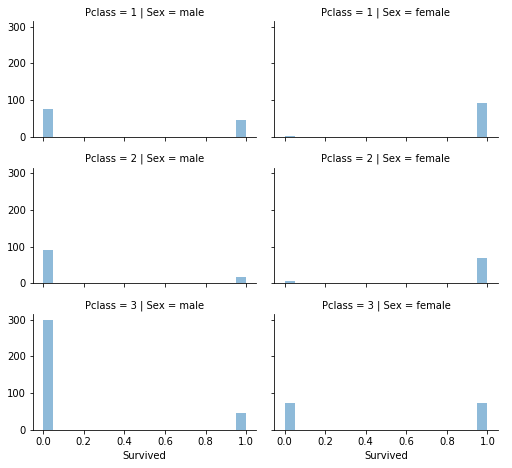

In [7]:
grid = sns.FacetGrid(train_df, col='Sex', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Survived', alpha=.5, bins=20)
grid.add_legend();

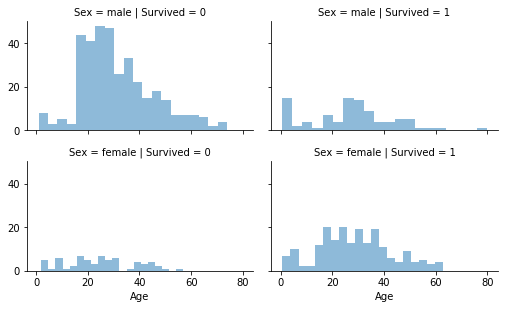

In [8]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


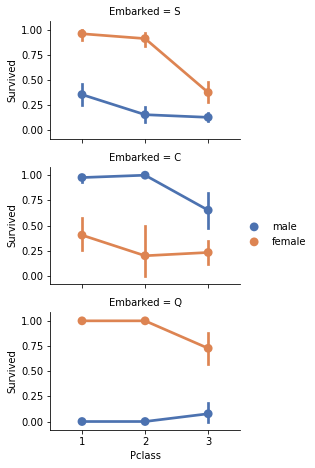

In [9]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

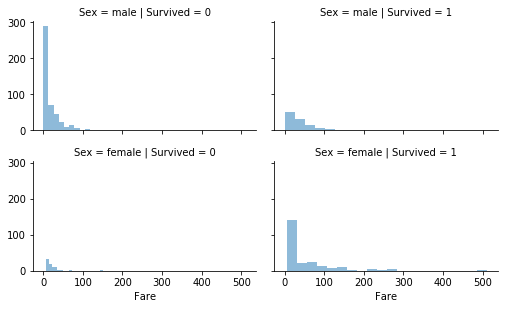

In [10]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Fare', alpha=.5, bins=20)
grid.add_legend();

# My rules
* after analysing the relations between each abstract, the following is the tree (rules) I made.
* I also calculate th gini purity for later comparison.
![caption](files/org_tree.png)

In [11]:
train_df = train_df.drop(columns=["PassengerId", "Cabin", "Ticket"])
train_df = train_df.drop(columns=["Name"])
train_df.iloc[1]

Survived          1
Pclass            1
Sex          female
Age              38
SibSp             1
Parch             0
Fare        71.2833
Embarked          C
Name: 1, dtype: object

In [23]:
# generate the data set that satifies the upper tree
datas = train_df
new = []

A = 0
B = 0
C = 0
D = 0
E = 0
F = 0
G = 0
H = 0

for i in range(891):
    data = datas.iloc[i]
    if data["Sex"] == "female":
        if data["Pclass"] == 3:
            if data["Embarked"] == "C":
                if data["Fare"] < 10:
                    data["Survived"] = 0
                    A = A + 1
                else:
                    data["Survived"] = 1
                    B = B + 1
            else:
                data["Survived"] = 1
                C = C + 1
        else:
            data["Survived"] = 1
            D = D + 1
    else:
        if data["Pclass"] != 1:
            if data["Embarked"] != "c":
                if data["Fare"] < 50:
                    data["Survived"] = 0
                    H = H + 1
                else:
                    data["Survived"] = 1
                    G = G + 1
            else:
                data["Survived"] = 1
                F = F + 1
        else:
            data["Survived"] = 1
            E = E + 1
    new.append(data)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/

In [13]:
from_a_to_g = [A/891, B/891, C/891, D/891, E/891, F/891, G/891, H/891]
print(from_a_to_g)

[0.004489337822671156, 0.02132435465768799, 0.13580246913580246, 0.19079685746352412, 0.13692480359147025, 0.0, 0.017957351290684626, 0.49270482603815935]


In [14]:
print([A, B, C, D, E, F, G, H])

[4, 19, 121, 170, 122, 0, 16, 439]


In [24]:
pd_new = pd.DataFrame(new)

sex_map = {'male' : 0, 'female' :1}
pd_new['Sex'] = pd_new['Sex'].map(sex_map)

Embarked_map = {'S' : 0, 'C' :1, 'Q':2}
pd_new['Embarked'] = pd_new['Embarked'].map(Embarked_map)

age = pd_new['Age']
avgage = age.sum(axis = 0, skipna = True) /len(age)
pd_new['Age'].fillna(avgage, inplace = True)

pd_new['Embarked'].fillna(2, inplace = True)


train = pd_new.drop(columns=["Survived"])
y = pd_new["Survived"]



In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz

import pydotplus

In [26]:
dtree=DecisionTreeClassifier(max_depth=5)
dtree.fit(train,y)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(train),
                class_names=['die','survive'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

True

In [18]:
dtree.feature_importances_

array([0.40206626, 0.51089887, 0.        , 0.        , 0.        ,
       0.08344329, 0.00359158])

                 Pclass  Sex    Age  SibSp  Parch  Fare  Embarked  
Gini importance: 0.402   0.510   0     0      0    0.08   0.003   

# Generated Tree
![caption](files/tree.png)

# Origin Tree
![caption](files/org_tree.png)

# Comparision
## structure
* the generated tree only has four layers instead of five
* the right side of the generated tree is very different from the original one. it statrt with Fare instead of Pclass
* the left side is more similar, only missing the layer of "Embarked"

## Information Gain
### right side
* the generated one and the original one are basically the same. As you can see,  the gini value for "Fare" and "Pclass" are the same.
* the only difference is that the generated one doesn't have "Embarked" node. It can be explained by information gain. Since the information gain of "Embarked" in the original tree is 0. So, in the training procedure, the "Embarked" node is discarded.

### left side
* this side of the tree are quite different. First, the generated one does not have "Pclass", and it star with "Fare"
* this is quite obvious that the information gain in the generated tree is much higher than te original one.